<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW9/higgsbosonSearch_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [3]:
cd drive/My\ Drive/

/content/drive/My Drive


In [ ]:
!ls kaggle.json

kaggle.json


In [4]:
!chmod 600 kaggle.json

In [5]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
!kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            935        108  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           3344         72  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1340        105  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT P

In [5]:
cd DSPS2023

/content/drive/My Drive/DSPS2023


In [ ]:
!mkdir kaggle_higgs

In [6]:
cd kaggle_higgs

/content/drive/My Drive/DSPS2023/kaggle_higgs


In [ ]:
!kaggle competitions download -c higgs-boson

 90% 49.0M/54.3M [00:00<00:00, 126MB/s]
100% 54.3M/54.3M [00:00<00:00, 123MB/s]


In [ ]:
!ls

higgs-boson.zip


In [ ]:
!unzip higgs-boson.zip

Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [ ]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.zip
higgs-boson.zip				 test.zip


In [ ]:
!unzip training.zip

Archive:  training.zip
  inflating: training.csv            


In [ ]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip	training.csv
higgs-boson.zip				 test.zip		training.zip


In [7]:
higgsdata = pd.read_csv('training.csv')

In [8]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [9]:
#Remove missing values
higgsdata = higgsdata[(higgsdata != -999.0)]
higgsdata.dropna(axis=0, inplace=True)

In [10]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,...,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,...,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,...,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,...,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,...,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,...,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.805035


 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf):

In [11]:
labels = higgsdata['Label'] # 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"

In [12]:
weights = higgsdata['Weight'] # the weight of the particle

In [13]:
higgsdata = higgsdata.drop(['EventId', 'Weight', 'Label'], axis=1) # Dropped also event ID, as it is kind of useless.

In [14]:
higgsdata.shape

(68114, 30)

use the "training.csv" file, but create your own train/test sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(higgsdata, labels, test_size=0.33, random_state=42)

- TASK: Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state=0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [18]:
labels.unique()

array(['s', 'b'], dtype=object)

In [19]:
rf = RandomForestClassifier(max_depth=4, random_state=42)
gbt = GradientBoostingClassifier(max_depth=4, random_state=42)

In [20]:
rf.fit(X_train, y_train)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [21]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.821544394776054, 0.817643918498087)

In [22]:
gbt.score(X_train, y_train), gbt.score(X_test, y_test)

(0.8575466736786748, 0.8446925883085684)

**Comment** is your model performing well? is it .... overfitting?

Given that the max depth is only 4, both methods seem to perform pretty well. The Gradient Boosting Classifier, for the same depth as the Random Forest Classifier, seems to give a better score for both training and test sets.

- Produce a confusion matrix for each model and compare them






In [24]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["P", "N"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)


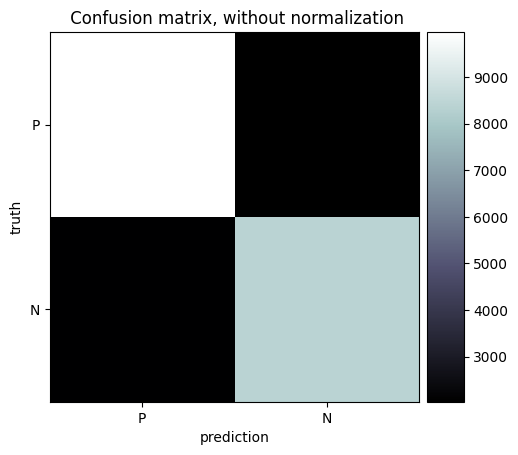

In [25]:
plot_confusion_matrix(y_test, rf.predict(X_test))

Figure 1. Confusion matrix for Random Forest Classifier on Higgs data. Both false positive and false negatives have relatively low values, which tells us that our model is performing classification well. Furthermore, the true positives and true negatives are also relatively high, also confirming the model's performance.

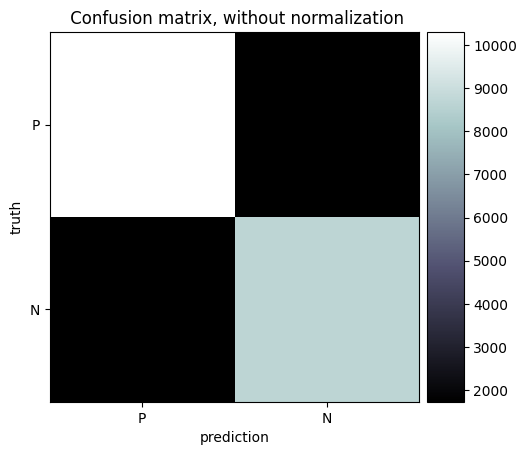

In [26]:
plot_confusion_matrix(y_test, gbt.predict(X_test))

Figure 2. Confusion matrix for Gradient Boosting Classifier. Once again, we see that the false positive and false negative values are very low, and the true positive and true negative values are high, showing a good performance of this classifier.

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [27]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata, weights, test_size=0.33, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rfR = RandomForestRegressor(n_estimators=100, max_depth=4,
                                  random_state=42)
rfR.fit(traindata_weights, train_weights)

gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                  random_state=42)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [29]:
rfR.score(traindata_weights, train_weights), rfR.score(testdata_weights, test_weights)

(0.3501142914154842, 0.34040777411222467)

In [30]:
gbtR.score(traindata_weights, train_weights), gbtR.score(testdata_weights, test_weights)

(0.5120413226551273, 0.4428063777196244)

The scores for both Random Forest Regressor and Gradient Boosting Regressor aren't very good. Definitely worse than the classifiers. Nonetheless, the Gradient Boosting Regressor seems to be performing better.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [33]:
rf_L1 = np.sum(np.abs(rfR.predict(testdata_weights) - test_weights))
gbt_L1 = np.sum(np.abs(gbtR.predict(testdata_weights) - test_weights))

rf_L2 = np.sum((rfR.predict(testdata_weights) - test_weights)**2)
gbt_L2 = np.sum((gbtR.predict(testdata_weights) - test_weights)**2)

print("L1 RF: {:.2f}".format(rf_L1))
print("L1 GBT: {:.2f}".format(gbt_L1))
print("L2 RF: {:.2f}".format(rf_L2))
print("L2 GBT: {:.2f}".format(gbt_L2))

L1 RF: 8886.70
L1 GBT: 7770.11
L2 RF: 8243.03
L2 GBT: 6963.34


**Discuss!**

We see that, in general, the L2 loss function is smaller for both the Random Forest and Gradient Boosting regressors. Also, we see that in general the Gradient Boosting Regressor performs better for the weights than the Random Forest Regressor (something that we also see by looking at the scores for each model).

# Choose between feature importance and grid optimization (both 461 and 661)


Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







In [35]:
feat_importances_rf = rf.feature_importances_
std = np.std([onetree.feature_importances_ for onetree in rf.estimators_], axis=0)
rf_indices = np.argsort(feat_importances_rf)[::-1]

best_features_index = np.zeros(4)

for i in range(4):
  best_features_index[i] = rf_indices[i]
  print("%d. feature %d %s (%f)" % (i + 1, rf_indices[i], higgsdata.columns[rf_indices[i]], feat_importances_rf[rf_indices[i]]))

1. feature 0 DER_mass_MMC (0.376062)
2. feature 4 DER_deltaeta_jet_jet (0.098874)
3. feature 6 DER_prodeta_jet_jet (0.093618)
4. feature 2 DER_mass_vis (0.086448)


The four most important features are:

1.   DER_mass_MMC: Estimated mass of the Higgs Boson candidate. Therefore, it is expected to be the most important feature of the data.
2.   DER_deltaeta_jet_jet: The absolute value of the pseudorapidity separation between the two jets.
3.   DER_prodeta_jet_jet: The product of the pseudorapidities of the two jets.
4.   DER_mass_vis: Invariant mass of the two particles.

In [36]:
higgsdata.iloc[:, best_features_index] #this sorts the data by feature

,DER_mass_MMC,DER_deltaeta_jet_jet,DER_prodeta_jet_jet,DER_mass_vis
0,138.470,0.910,2.666,97.827
5,89.744,2.636,-0.540,59.149
6,148.754,0.733,0.113,107.782
11,114.744,2.563,-1.401,75.712
23,141.481,1.955,-0.923,111.581
...,...,...,...,...
249976,137.371,3.189,-2.384,92.603
249980,119.934,0.660,1.836,88.751
249985,126.151,1.000,-0.240,95.258
249993,130.075,0.936,-0.207,66.781


In [37]:
# choose your preferred values for the parameters you will test
higgs_best = higgsdata.iloc[:, best_features_index]

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [38]:
X_test_bhiggs, X_train_bhiggs, y_test_bhiggs, y_train_bhiggs = train_test_split(higgs_best, labels, test_size=0.33, random_state=42)

In [39]:
n_estimators = [10, 100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 10]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [41]:
print(random_grid)

{'n_estimators': [10, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 10, None], 'bootstrap': [True, False]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=10, cv=3)

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [47]:
random_search.fit(X_test_bhiggs, y_test_bhiggs)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [49]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))

Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best score is 0.8020422473485844


In [50]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters

In [52]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.879542,0.009261,0.049943,0.000501,10,sqrt,10,False,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.797068,0.803773,0.796411,0.799084,0.003327,3
1,16.159654,0.030527,0.429591,0.005557,100,auto,None,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.777741,0.782540,0.778727,0.779670,0.002069,6
2,1.437006,0.013678,0.074039,0.004995,10,auto,None,False,"{'n_estimators': 10, 'max_features': 'auto', '...",0.766040,0.770576,0.768341,0.768319,0.001852,9
3,1.215716,0.024707,0.086639,0.001705,10,auto,10,False,"{'n_estimators': 10, 'max_features': 'auto', '...",0.797068,0.803773,0.796411,0.799084,0.003327,3
4,9.707861,0.335691,0.234171,0.039149,100,auto,10,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.798120,0.808243,0.798777,0.801714,0.004625,2


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=10, bootstrap=True)
rf.fit(X_train, y_train.values.flatten()=="s")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto')

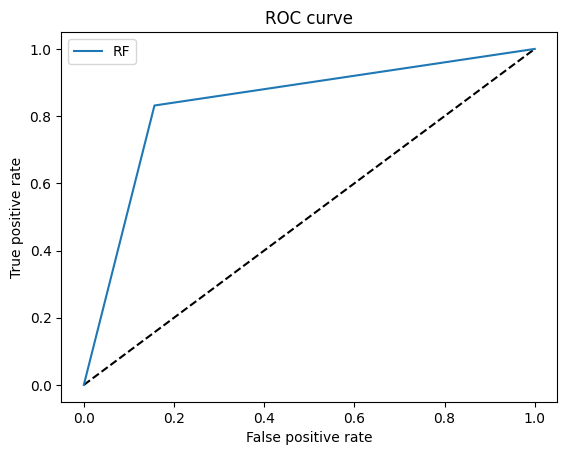

In [57]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test.values.flatten()=="s", rf.predict(X_test))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Figure 3. ROC curve for Random Forest Classifier using the best parameters found with random search. The curve shows the relationship between false positive and true positive rates. This curve tells us that if we care about minimizing the false positives, the parameters we should use fall around a 0.82 true positive rate and a 0.18 false positive rate.